# Stock Price Prediction

## 1. Problem Definition

Stock trading is always an attractive and interesting investment channel for a lot of people.
However, predicting the trend of stock and identify the best time to buy, sell or hold stocks is
always a very tricky traditional question. Many people, from generation to generation, have tried
to solve this problem. People have tried a lot to find a pattern in stock price as well as a general
equation for stock’s trend. However, it is so difficult because stock price is dependent to many
factors from macro economy, international economy, news... to stock trading history price and
the company’s health itself.

There are 2 famous traditional methods in financial field to analysis stock trend: fundamental
analysis which concentrates on the company’s heath ratio and technical analysis which doesn’t
care about the company’s health but concentrates on the stock trading history to find the trend
pattern. Each method can be successful with some stocks but failed for others. Until now, a lot of
people in stock trading environment still use these 2 methods as a reference for their stock trading
decision but the effectiveness of those methods is still a big question.

With the developing of ML, there are some studies on applying machine learning on stock trend
predicting but all of them just concentrated on stock price history, some reported on the
sentiment analysis on stock trading but there is no holistic view and approach to study all affected
factors to stock market and study about them. And so far, there is no report about applying these
studies in real-life stock trading.

Therefore, finding a holistic solution that combines fundamental analysis, technical analysis,
related factors, stock price history and machine learning in order to produce a powerful model
and tool to predict stock trend is the big challenge we want to address in this project.

## 2. Business Understanding

By collecting all data sources from financial news, reviews, social media, domestic economy
indicators, international economy indicator, market indicator, stock price history, stock
fundamental ratio and then apply machine learning techniques including text mining, sentiment
analysis, time series process and classification models, the project tries to implement a
holistic solution to solve the stock prediction problem and build a high performance model that can be used for stock trading.

We are going tu use financial news and social media comments to mine sentiment analysis as a time series process. The sentiment analysis will be added features to stocks techn ical indicators. By collecting all data sources from financial news, reviews, social media, domestic economy
indicators, international economy indicator, market indicator, stock price history, stock
fundamental ratio and then apply machine learning techniques including text mining, sentiment
analysis, time series process and classification models, the project is promising implement a
holistic solution to solve the stock prediction problem and build up a model with high
performance to apply in stock trading application.

Using this approach for feature generation we hope to have capture most factors tat could influence stock prices.

Besides technical analysis we are also going to present meaningful data that can be used as reference in the decision making process.

## 3. Data Collection

### a) Twitter Web Scraper

Our Twitter web scraper is using __"pattern"__ library to get data from Twitter and apply sentiment analysis to tweets collected online. __"Pattern"__ is a very versatile library that, beside sentiment analysis also has interfaces to major web entities. It can be very useful when scraping data. The library outputs two indicators related to sentiment analysis. First indicator is the sentiment - a value ranging between -1 and +1 for negative/ positive sentiment. Second indicator is subjectivity - a value ranging between 0 and 1.

In [1]:
from __future__ import print_function
from __future__ import unicode_literals

from builtins import str, bytes, dict, int
from builtins import range

from pattern.web import Twitter, hashtags
from pattern.db import Datasheet, pprint, pd
from pattern.en import sentiment, polarity, subjectivity, positive

try:
    # We'll store tweets in a Datasheet.
    # A Datasheet is a table of rows and columns that can be exported as a CSV-file.
    # In the first column, we'll store a unique id for each tweet.
    # We only want to add the latest tweets, i.e., those we haven't seen yet.
    # With an index on the first column we can quickly check if an id already exists.
    # The pd() function returns the parent directory of this script + any given path.
    table = Datasheet.load(pd("tweets.csv"))
    index = set(table.columns[0])
except:
    table = Datasheet()
    index = set()

engine = Twitter(language="en")


In [2]:
prev = '1071765537749917696'

counter = 0
#set the counter to 1 - this will give us only one tweet as and example
while counter < 1:

    counter += 1
#normally we will have to wait between queries because Twitter will not accept more than a 
#certain number of queries per hour
#    time.sleep(60)
    for tweet in engine.search("#Apple", start=prev, count=10, cached=False):
#        print(tweet.id)
#        print(tweet.text)
#        print(tweet.date)
        tweet_sentiment = sentiment(tweet.text)
        print("Sentiment for tweet ID: ", tweet.id, " is ", tweet_sentiment)
        
        if len(table) == 0 or tweet.id not in index:
             
            table.append([tweet.id, tweet.date, tweet.text, tweet_sentiment])
            index.add(tweet.id)
            
        prev = tweet.id
        
        
        


Sentiment for tweet ID:  1071765450873278465  is  (0.0, 0.1)
Sentiment for tweet ID:  1071765431067779073  is  (0.06818181818181818, 0.22727272727272727)
Sentiment for tweet ID:  1071765168860880897  is  (0.75, 0.4)
Sentiment for tweet ID:  1071764863628664833  is  (0.0, 0.0)
Sentiment for tweet ID:  1071764809887162368  is  (0.4, 0.4)
Sentiment for tweet ID:  1071764695810371585  is  (-0.1, 0.3)
Sentiment for tweet ID:  1071764462988800000  is  (0.24659090909090908, 0.4636363636363636)
Sentiment for tweet ID:  1071764285137870850  is  (0.0, 0.0)
Sentiment for tweet ID:  1071764224890814464  is  (0.0, 0.0)


### b) Nasdaq News Scraper

Unlike Twitter Nasdaq will let you scrape data at high frequency but the downside is that if you ask for too much data at relatively high frequency you will get banned from scraping Nasdaq data (we've learned this the hard way). The only solution to this is use a VPN that will allow you to change your IP address in case you get banned.

We used the __"BeatifulSoup"__ package to get news articles from Nasdaq then, after inspecting the article in a web browser, we extracted only the parts that were interesting for us.

Once the text has been extracted we used the same __"pattern"__ library to do sentiment analysis on the article's text.

In [3]:
from __future__ import print_function
from __future__ import unicode_literals

from pattern.db import Datasheet, pprint, pd
from pattern.en import sentiment, polarity, subjectivity, positive

import requests
from bs4 import BeautifulSoup

counter = 0

'''Package what we did above into a function'''
def scrape_news_text(news_url):
    
    global counter
 
    news_html = requests.get(news_url).content
    
#    print(news_html)
 
    '''convert html to BeautifulSoup object'''
    news_soup = BeautifulSoup(news_html , 'lxml')
# soup.find("div", {"id": "articlebody"})
#    paragraphs = [par.text for par in news_soup.find_all('p')]
#    news_text = '\n'.join(paragraphs)

#    print(news_soup.find("div", {"id": "articleText"}))
    
    
    date_object = news_soup.find(itemprop="datePublished")
    news_object = news_soup.find("div", {"id": "articleText"})
    
    if date_object is None:
        return "  "
    
    if news_object is None:
        return "   "


    news_date = date_object.get_text()#   find("div", {"id": "articleText"}).text
    news_text = news_object.text
    
#    print(news_date)
#    print(news_text)
    print(news_url)
    
    try:
        # We'll store tweets in a Datasheet.
        # A Datasheet is a table of rows and columns that can be exported as a CSV-file.
        # In the first column, we'll store a unique id for each tweet.
        # We only want to add the latest tweets, i.e., those we haven't seen yet.
        # With an index on the first column we can quickly check if an id already exists.
        # The pd() function returns the parent directory of this script + any given path.
        table = Datasheet.load(pd("nasdaq3.csv"))
    except:
        table = Datasheet()
        
    news_sentiment = sentiment(news_text)
    
    print("Article ", news_url, " from ", news_date, " sentiment ", news_sentiment)
        
    table.append([counter, news_date, news_url, news_sentiment])

    table.save(pd("nasdaq3.csv"))    
    
    counter += 1

    return news_text 

'''Generalized function to get all news-related articles from a Nasdaq webpage'''
def get_news_urls(links_site):
    '''scrape the html of the site'''
    resp = requests.get(links_site)
 
    if not resp.ok:
        return None
 
    html = resp.content
 
    '''convert html to BeautifulSoup object'''
    soup = BeautifulSoup(html , 'lxml')
 
    '''get list of all links on webpage'''
    links = soup.find_all('a')
    
    urls = [link.get('href') for link in links]
    urls = [url for url in urls if url is not None]
 
    '''Filter the list of urls to just the news articles'''
    news_urls = [url for url in urls if '/article/' in url]

#    print(news_urls[0])
    
    return news_urls#scrape_news_text(news_urls[0])

def scrape_all_articles(ticker , upper_page_limit = 5):
 
    landing_site = 'http://www.nasdaq.com/symbol/' + ticker + '/news-headlines'
    
#    print(landing_site)
    
#    return get_news_urls(landing_site)
 
    all_news_urls = get_news_urls(landing_site)
 
    current_urls_list = all_news_urls.copy()
 
    index = 2
 
    '''Loop through each sequential page, scraping the links from each'''
    while (current_urls_list is not None) and (current_urls_list != []) and \
        (index <= upper_page_limit):
 
        '''Construct URL for page in loop based off index'''
        current_site = landing_site + '?page=' + str(index)
        
        print(current_site)
        
        current_urls_list = get_news_urls(current_site)
 
        '''Append current webpage's list of urls to all_news_urls'''
        all_news_urls = all_news_urls + current_urls_list
 
        index = index + 1
 
    all_news_urls = list(set(all_news_urls))
 
    '''Now, we have a list of urls, we need to actually scrape the text'''
    all_articles = [scrape_news_text(news_url) for news_url in all_news_urls]
 
    return all_articles


aapl_articles = scrape_all_articles('aapl' , 1)

https://www.nasdaq.com/article/why-johnson-johnson-costco-and-apple-slumped-today-cm1069773
Article  https://www.nasdaq.com/article/why-johnson-johnson-costco-and-apple-slumped-today-cm1069773  from  December 14, 2018, 04:55:38 PM EDT  sentiment  (0.15434523809523806, 0.43101190476190465)
https://www.nasdaq.com/article/apple-stock-below-170-time-to-buy-cm1069981
Article  https://www.nasdaq.com/article/apple-stock-below-170-time-to-buy-cm1069981  from  December 16, 2018, 11:05:00 AM EDT  sentiment  (0.16015345765345765, 0.49340936840936833)
https://www.nasdaq.com/article/3-augmented-reality-stocks-to-buy-in-2019-cm1069924
Article  https://www.nasdaq.com/article/3-augmented-reality-stocks-to-buy-in-2019-cm1069924  from  December 15, 2018, 05:00:00 PM EDT  sentiment  (0.18964947089947096, 0.48491696061140493)
https://www.nasdaq.com/article/tech-stocks-this-week-apple-slides-roku-gets-slammed-and-more-cm1069940
Article  https://www.nasdaq.com/article/tech-stocks-this-week-apple-slides-roku

As we can notice above the sentiment as of Dec 16 2018 is neutral towards positive. In the following section we are going to see some correlation between this sentiment and AAPL stock price trend for last week.

### c) Yahoo Financials Stock Price Scraper

__"Yahoofinancials"__ library has been used to collect financial information for the stock we want to analyze. 

In order to make it easier to add/remove features and also to manipulate data in the future we created three different classes each of them encapsulating different functionality. This will make it much easier to add new features and alter existing features.

In [4]:
import pandas as pd
from stockstats import StockDataFrame as Sdf
from datetime import datetime, timedelta
from yahoofinancials import YahooFinancials
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


class Price:
    def __init__(self, date, high, low, open, close, volume, adj_close, formatted_date):
        self.date = date
        self.high = high
        self.low = low
        self.open = open
        self.close = close
        self.volume = volume
        self.adj_close = adj_close
        self.formatted_date = formatted_date
        self.maShort = 0
        self.maLong = 0
        self.label_price = 'N/A'
        self.label_trend = 'N/A'
        self.prev30 = 0.0
        self.prev07 = 0.0
        self.after07 = 0.0
        self.after30 = 0.0
        self.bin_prev30 = 'N/A'
        self.bin_prev07 = 'N/A'
        self.bin_after07 = 'N/A'
        self.bin_after30 = 'N/A'
        self.vol_state = 'N/A'

    def asdict(self):
        return {'date': self.date, 'high': self.high, 'low': self.low,
                'open': self.open, 'close': self.close, 'volume': self.volume,
                'adj_close': self.adj_close, 'formatted_date': self.formatted_date,
                'maShort': self.maShort, 'maLong': self.maLong,
                'label_price': self.label_price, 'label_trend': self.label_trend,
                'prev30': self.prev30, 'prev07': self.prev07, 'after07': self.after07, 'after30': self.after30,
                'bin_prev30': self.bin_prev30, 'bin_prev07': self.bin_prev07,
                'bin_after07': self.bin_after07, 'bin_after30': self.bin_after30,
                'vol_state':self.vol_state}


class PriceHistory:
    def __init__(self, raw_prices, ma_short, ma_long):
        self.ma_short = ma_short
        self.ma_long = ma_long
        prices = raw_prices
        price_list = []
        for price in prices:
            price_list.append(Price(price["date"], price["high"], price["low"], price["open"], price["close"],
                                    price["volume"], price["adjclose"], price["formatted_date"]))
        price_list.sort(key=lambda x: x.date, reverse=True)
        self.PriceHistory = price_list.copy()
        self.PriceFeature = self.assign_ma()

    def get_ma(self, from_index, days):
        end_index = min(len(self.PriceHistory), from_index + days)
        sub_list = self.PriceHistory[from_index: end_index]
        sum_close = 0
        for x in sub_list:
            sum_close += x.close
        return sum_close / days

    def get_label_as_price(self, index):
        next_day_index = index - 1
        if next_day_index >= 0:
            return self.PriceHistory[next_day_index].close
        else:
            return 'N/A'

    def get_label_as_trend(self, index):
        next_day_index = index - 1
        if next_day_index >= 0:
            change = self.PriceHistory[next_day_index].close - self.PriceHistory[index].close
            if change > 0:
                return 'UP'
            elif change == 0:
                return 'NEUTRAL'
            else:
                return 'DOWN'
        else:
            return 'N/A'

    def get_perc_prev(self, index, daydiff):
        next_day_index = index - daydiff
        if next_day_index >= 0:
            change = (self.PriceHistory[index].close - self.PriceHistory[next_day_index].close)/self.PriceHistory[index].close * 100
            return change
        else:
            return -100

    def get_perc_after(self, index, daydiff):
        end_index = len(self.PriceHistory)
        next_day_index = index + daydiff
        if next_day_index < end_index:
            change = (self.PriceHistory[next_day_index].close - self.PriceHistory[index].close)/self.PriceHistory[index].close * 100
            return change
        else:
            return -100

    def get_bin_perc(self, change):

        if change == 0:
            return '0.Neutral'
        elif 5 > change > 0:
            return '1.Low Increase'
        elif 10 > change >= 5:
            return '2.Moderate Increase'
        elif 15 > change >= 10:
            return '3.High Increase'
        elif 20 > change >= 15:
            return '4.Very High Increase'
        elif change >= 20:
            return '5. Extreme Increase'
        elif -5 < change < 0:
            return '-1.Low Decrease'
        elif -10 <= change <= -5:
            return '-2.Moderate Decrease'
        elif -15 <= change <= -5:
            return '-3.High Decrease'
        elif -20 <= change <= -5:
            return '-4.Very High Decrease'
        elif change <= -20:
            return '-5.Extreme Decrease'
        else:
            return 'N/A'

    def get_bin_volume(self, index):

        if self.PriceHistory[index].volume == 0:
            return '0.No Volume'
        elif 30000000 >= self.PriceHistory[index].volume > 0:
            return '1.Low Volume'
        elif 50000000 >= self.PriceHistory[index].volume > 30000000:
            return '2.Moderate Volume'
        elif 80000000 >= self.PriceHistory[index].volume > 50000000:
            return '3.High Volume'
        elif self.PriceHistory[index].volume > 80000000:
            return '4.Extreme Volume'
        else:
            return '-1.N/A'


    def assign_ma(self):
        price_history = self.PriceHistory.copy()
        price_dict_list = []
        for price in price_history:
            price.maShort = self.get_ma(price_history.index(price), self.ma_short)
            price.maLong = self.get_ma(price_history.index(price), self.ma_long)
            price.label_price = self.get_label_as_price(price_history.index(price))
            price.label_trend = self.get_label_as_trend(price_history.index(price))
            price.prev30 = self.get_perc_prev(price_history.index(price), 30)
            price.prev07 = self.get_perc_prev(price_history.index(price), 7)
            price.after30 = self.get_perc_after(price_history.index(price), 30)
            price.after07 = self.get_perc_after(price_history.index(price), 7)
            price.bin_prev30 = self.get_bin_perc(price.prev30)
            price.bin_prev07 = self.get_bin_perc(price.prev07)
            price.bin_after07 = self.get_bin_perc(price.after07)
            price.bin_after30 = self.get_bin_perc(price.after30)
            price.vol_state = self.get_bin_volume(price_history.index(price))
            price_dict = price.asdict().copy()
            price_dict_list.append(price_dict)
        return price_dict_list


class StockPrice:
    def __init__(self, stock, from_date, to_date, ma_short, ma_long):
        self.stock = stock
        self.from_date = from_date
        self.to_date = to_date
        self.ma_short = ma_short
        self.ma_long = ma_long
        # assign prices
        prices = YahooFinancials(stock).get_historical_price_data(from_date, to_date, 'daily')[stock]["prices"]
        self.price_history = PriceHistory(prices, ma_short, ma_long)


Now get 1 year worth of data from Yahoo and just look at it. This will help us decide what else we would like to add in order to get our model to work reasonably well.

In [5]:
ticker = 'AAPL'
to_date = datetime.strftime(datetime.today() - timedelta(days=1), '%Y-%m-%d')
from_date = datetime.strftime(datetime.today() - timedelta(days=2*365), '%Y-%m-%d')

appl = StockPrice(ticker, from_date, to_date, 2, 15)
data = pd.DataFrame(appl.price_history.PriceFeature)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 21 columns):
adj_close         502 non-null float64
after07           502 non-null float64
after30           502 non-null float64
bin_after07       502 non-null object
bin_after30       502 non-null object
bin_prev07        502 non-null object
bin_prev30        502 non-null object
close             502 non-null float64
date              502 non-null int64
formatted_date    502 non-null object
high              502 non-null float64
label_price       502 non-null object
label_trend       502 non-null object
low               502 non-null float64
maLong            502 non-null float64
maShort           502 non-null float64
open              502 non-null float64
prev07            502 non-null float64
prev30            502 non-null float64
vol_state         502 non-null object
volume            502 non-null int64
dtypes: float64(11), int64(2), object(8)
memory usage: 82.4+ KB


Now, that we have the data, we are going to use ["stockstats"](https://pypi.org/project/stockstats/) in order to get some objective stock indicators curently used in the financial world. __"Stockstats"__ provides a wealth of indicators like: moving averages, exponential moving averages, raw stochastic values, etc. 

In [6]:
# Append technical indicators into feature dataframe
stock = Sdf.retype(data)

data['volume_delta'] = stock['volume_delta']
data['open_-2_r'] = stock['open_-2_r']

data['cr-ma1'] = stock['cr-ma1']
data['cr-ma2'] = stock['cr-ma2']
data['cr-ma3'] = stock['cr-ma3']
data['cr-ma2_xu_cr-ma1_20_c'] = stock['cr-ma2_xu_cr-ma1_20_c']


data['volume_-3,2,-1_max'] = stock['volume_-3,2,-1_max']
data['volume_-3~1_min'] = stock['volume_-3~1_min']

data['kdjk'] = stock['kdjk']
data['kdjd'] = stock['kdjd']
data['kdjj'] = stock['kdjj']


data['close_2_sma'] = stock['close_2_sma']
data['close_5_sma'] = stock['close_5_sma']
data['close_20_sma'] = stock['close_20_sma']
data['close_50_sma'] = stock['close_50_sma']
data['close_200_sma'] = stock['close_200_sma']

data['rsi_6'] = stock['rsi_6']
data['rsi_12'] = stock['rsi_12']

data['wr_10'] = stock['wr_10']
data['wr_6'] = stock['wr_6']

# CCI, default to 14 days
data['cci'] = stock['cci']
# 20 days CCI
data['cci_20'] = stock['cci_20']

# TR (true range)
data['tr'] = stock['tr']
# ATR (Average True Range)
data['atr'] = stock['atr']

# DMA, difference of 10 and 50 moving average
data['dma'] = stock['dma']

# DMI
# +DI, default to 14 days
data['pdi'] = stock['pdi']
# -DI, default to 14 days
data['mdi'] = stock['mdi']
# DX, default to 14 days of +DI and -DI
data['dx'] = stock['dx']
# ADX, 6 days SMA of DX, same as stock['dx_6_ema']
data['adx'] = stock['adx']
# ADXR, 6 days SMA of ADX, same as stock['adx_6_ema']
data['adxr'] = stock['adxr']
# TRIX, default to 12 days
data['trix'] = stock['trix']
# MATRIX is the simple moving average of TRIX
data['trix_9_sma'] = stock['trix_9_sma']
# VR, default to 26 days
data['vr'] = stock['vr']
# MAVR is the simple moving average of VR
data['vr_6_sma'] = stock['vr_6_sma']

# MACD
data['macd'] = stock['macd']
# MACD signal line
data['macds'] = stock['macds']
# MACD histogram
data['macdh'] = stock['macdh']

# bolling, including upper band and lower band
data['boll'] = stock['boll']
data['boll_ub'] = stock['boll_ub']
data['boll_lb'] = stock['boll_lb']

plt.interactive(True)

/home/silviu/.local/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/silviu/anaconda3/lib/python3.6/site-packages/stockstats.py:189: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  center=False, window=shifts).apply(np.count_nonzero)
/home/silviu/anaconda3/lib/python3.6/site-packages/stockstats.py:387: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the cur

Plot stock price histograms.

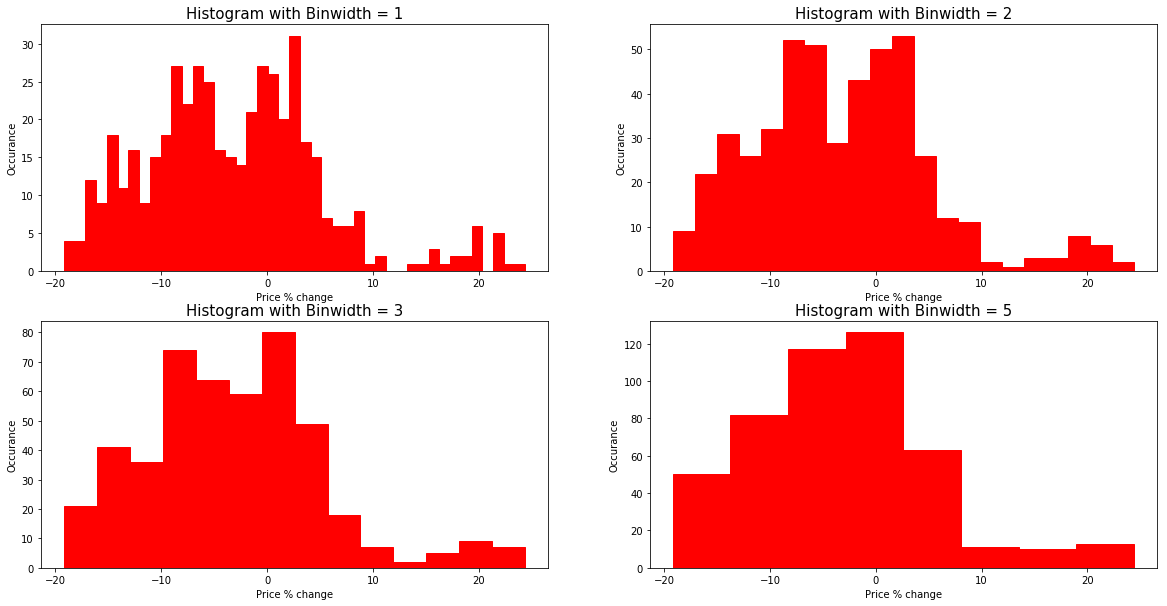

In [7]:
#filtering out of range data
prev30_filter = data.loc[data['prev30'] != -100 ]
prev07_filter = data.loc[data['prev07'] != -100 ]
after07_filter = data.loc[data['after07'] != -100 ]
after30_filter = data.loc[data['after30'] != -100 ]



#prev30_filter graph
prev30_min = prev30_filter['prev30'].min()
prev30_max = prev30_filter['prev30'].max()

plt.figure(figsize=(20,10))

for i, binwidth in enumerate([1, 2, 3, 5]):
    # Set up the plot
    p30 = plt.subplot(2, 2, i + 1)

    # Draw the plot
    p30.hist(prev30_filter['prev30'], color='red', edgecolor='red', bins=int(abs(prev30_max - prev30_min)/binwidth))

    # Title and labels
    p30.set_title('Histogram with Binwidth = %d' % binwidth, size=15)
    p30.set_xlabel('Price % change', size=10)
    p30.set_ylabel('Occurance', size=10)
 


Same for 7 days history, 30 days and volume as well

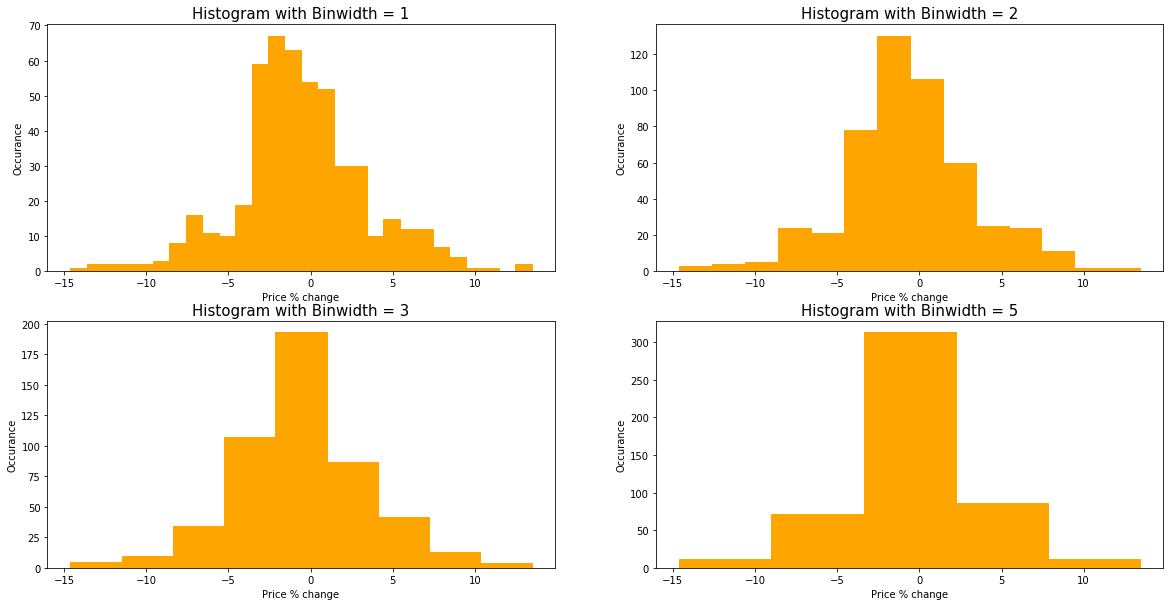

In [8]:
#prev07_filter_graph
prev07_min = prev07_filter['prev07'].min()
prev07_max = prev07_filter['prev07'].max()
plt.figure(figsize=(20,10))
for i, binwidth in enumerate([1, 2, 3, 5]):
    # Set up the plot
    p07 = plt.subplot(2, 2, i + 1)

    # Draw the plot
    p07.hist(prev07_filter['prev07'], color='orange', edgecolor='orange', bins=int(abs(prev07_max - prev07_min)/binwidth))

    # Title and labels
    p07.set_title('Histogram with Binwidth = %d' % binwidth, size=15)
    p07.set_xlabel('Price % change', size=10)
    p07.set_ylabel('Occurance', size=10)


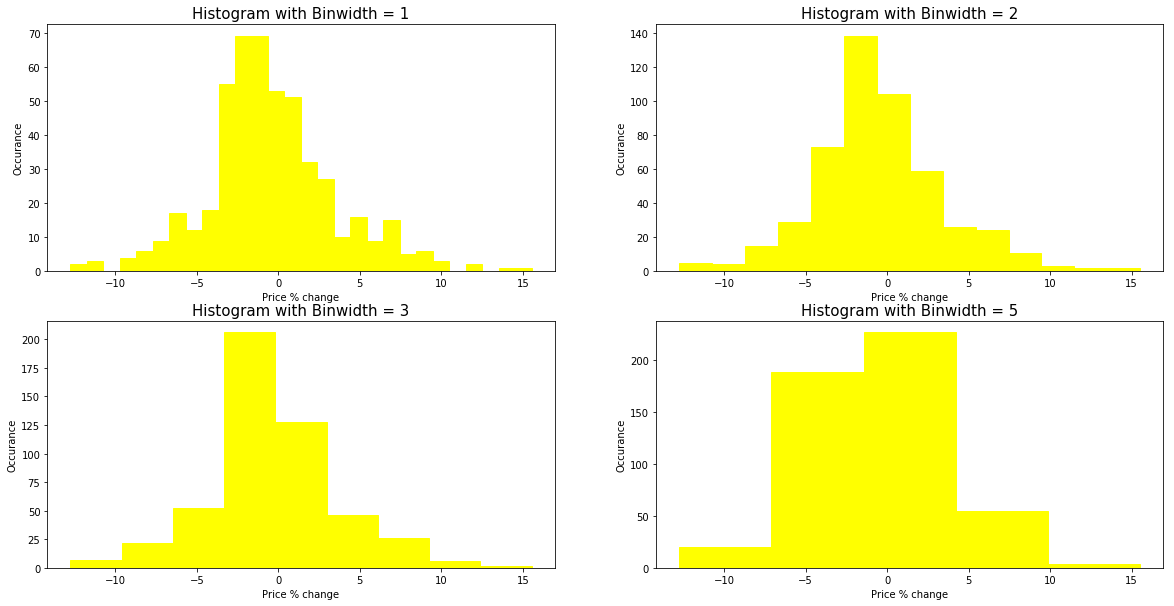

In [9]:
#after07_filter_graph
after07_min = after07_filter['after07'].min()
after07_max = after07_filter['after07'].max()
plt.figure(figsize=(20,10))
for i, binwidth in enumerate([1, 2, 3, 5]):
    # Set up the plot
    a07 = plt.subplot(2, 2, i + 1)

    # Draw the plot
    a07.hist(after07_filter['after07'], color='yellow', edgecolor='yellow', bins=int(abs(after07_max - after07_min)/binwidth))

    # Title and labels
    a07.set_title('Histogram with Binwidth = %d' % binwidth, size=15)
    a07.set_xlabel('Price % change', size=10)
    a07.set_ylabel('Occurance', size=10)

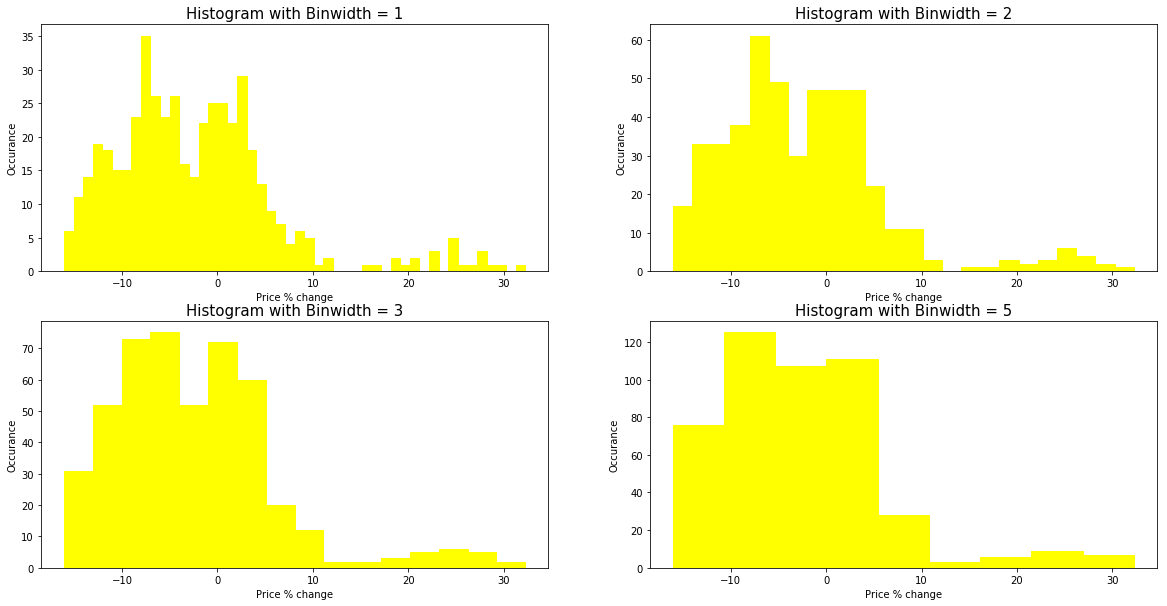

In [10]:
#after30_filter_graph
after30_min = after30_filter['after30'].min()
after30_max = after30_filter['after30'].max()
plt.figure(figsize=(20,10))
for i, binwidth in enumerate([1, 2, 3, 5]):
    # Set up the plot
    a30 = plt.subplot(2, 2, i + 1)

    # Draw the plot
    a30.hist(after30_filter['after30'], color='yellow', edgecolor='yellow', bins=int(abs(after30_max - after30_min)/binwidth))

    # Title and labels
    a30.set_title('Histogram with Binwidth = %d' % binwidth, size=15)
    a30.set_xlabel('Price % change', size=10)
    a30.set_ylabel('Occurance', size=10)


Volume plot

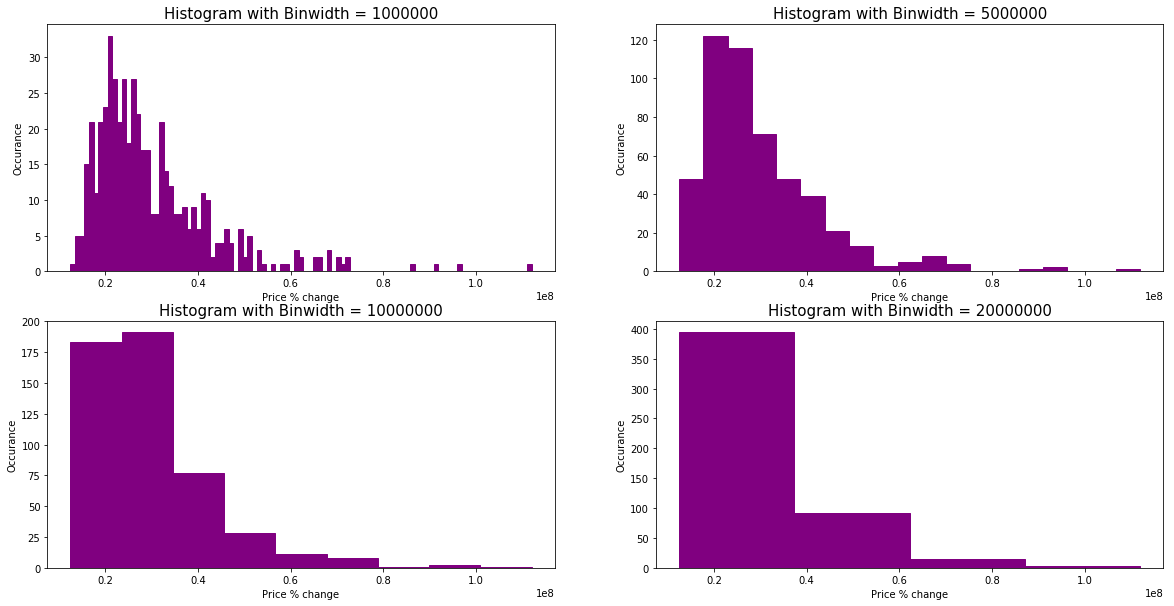

In [11]:
#volume_graph
volume_min = data['volume'].min()
volume_max = data['volume'].max()
plt.figure(figsize=(20,10))
for i, binwidth in enumerate([1000000 ,5000000, 10000000, 20000000]):
    # Set up the plot
    vg = plt.subplot(2, 2, i + 1)

    # Draw the plot
    vg.hist(data['volume'], color='purple', edgecolor='purple', bins=int(abs(volume_max - volume_min)/binwidth))

    # Title and labels
    vg.set_title('Histogram with Binwidth = %d' % binwidth, size=15)
    vg.set_xlabel('Price % change', size=10)
    vg.set_ylabel('Occurance', size=10)

In [12]:
#distribution group
prev30_group = prev30_filter[['bin_prev30','prev30']].groupby(['bin_prev30']).agg(['count','mean'])
print(prev30_group)

                      prev30           
                       count       mean
bin_prev30                             
-1.Low Decrease           90  -2.209886
-2.Moderate Decrease     119  -7.379828
-3.High Decrease          67 -12.611557
-4.Very High Decrease     31 -16.676661
1.Low Increase           112   2.287955
2.Moderate Increase       28   7.187229
3.High Increase            4  12.213286
4.Very High Increase      13  18.204273
5. Extreme Increase        8  22.023288


In [13]:
prev07_group = prev07_filter[['bin_prev07','prev07']].groupby(['bin_prev07']).agg(['count','mean'])
print(prev07_group)

                     prev07           
                      count       mean
bin_prev07                            
-1.Low Decrease         252  -1.975747
-2.Moderate Decrease     43  -7.039996
-3.High Decrease          8 -12.150843
1.Low Increase          146   1.851729
2.Moderate Increase      42   6.643243
3.High Increase           4  11.823594


In [14]:
after07_group = after07_filter[['bin_after07','after07']].groupby(['bin_after07']).agg(['count','mean'])
print(after07_group)

                     after07           
                       count       mean
bin_after07                            
-1.Low Decrease          254  -1.946837
-2.Moderate Decrease      44  -6.847356
-3.High Decrease           5 -11.571103
1.Low Increase           141   1.791014
2.Moderate Increase       47   6.915958
3.High Increase            3  12.731817
4.Very High Increase       1  15.532832


In [15]:
after30_group = after30_filter[['bin_after30','after30']].groupby(['bin_after30']).agg(['count','mean'])
print(after30_group)

                      after30           
                        count       mean
bin_after30                             
-1.Low Decrease           102  -2.462197
-2.Moderate Decrease      122  -7.384976
-3.High Decrease           77 -12.404755
-4.Very High Decrease       6 -15.613666
1.Low Increase            106   2.205973
2.Moderate Increase        32   7.118213
3.High Increase             4  10.850364
4.Very High Increase        5  17.996386
5. Extreme Increase        18  25.499046


In [16]:
volume_group = data[['vol_state','volume']].groupby(['vol_state']).agg(['count','mean'])
print(volume_group)

                  volume              
                   count          mean
vol_state                             
1.Low Volume         313  2.243583e+07
2.Moderate Volume    154  3.760558e+07
3.High Volume         31  6.054661e+07
4.Extreme Volume       4  9.653855e+07


In [17]:
print(data.columns.get_values())

['adj_close' 'after07' 'after30' 'bin_after07' 'bin_after30' 'bin_prev07'
 'bin_prev30' 'close' 'formatted_date' 'high' 'label_price' 'label_trend'
 'low' 'malong' 'mashort' 'open' 'prev07' 'prev30' 'vol_state' 'volume'
 'volume_delta' 'open_-2_r' 'middle' 'cr' 'cr-ma1' 'cr-ma2' 'cr-ma3'
 'cr-ma1_20_c' 'cr-ma2_xu_cr-ma1_20_c' 'volume_-3_s' 'volume_-1_s'
 'volume_2_s' 'volume_-3,2,-1_max' 'volume_-2_s' 'volume_0_s' 'volume_1_s'
 'volume_-3~1_min' 'rsv_9' 'kdjk_9' 'kdjk' 'kdjd_9' 'kdjd' 'kdjj_9' 'kdjj'
 'close_2_sma' 'close_5_sma' 'close_20_sma' 'close_50_sma' 'close_200_sma'
 'close_-1_s' 'close_-1_d' 'rs_6' 'rsi_6' 'rs_12' 'rsi_12' 'wr_10' 'wr_6'
 'middle_14_sma' 'cci' 'middle_20_sma' 'cci_20' 'tr' 'atr' 'close_10_sma'
 'dma' 'high_delta' 'um' 'low_delta' 'dm' 'pdm' 'pdm_14_ema' 'pdm_14'
 'atr_14' 'pdi_14' 'pdi' 'mdm' 'mdm_14_ema' 'mdm_14' 'mdi_14' 'mdi'
 'dx_14' 'dx' 'dx_6_ema' 'adx' 'adx_6_ema' 'adxr' 'trix' 'trix_9_sma'
 'change' 'vr' 'vr_6_sma' 'close_12_ema' 'close_26_ema' 'macd' 

### d) Getting stock data from StockPriceForModel

We can choose any ticker and the time period (e.g. 2,3,5 or 10 years) to train and predict data. The code will grasp data from today to the time period you choose.

In this code, we choose APPLE stock with time period = 10 years.

Each record in the price_features will contains the original stock trading data and the price label (label_price) which is the close price of the next day as the class to predict.

We also add numbers of technical indicators which captures all historical data and the historical stock movement's important information.

Here is the list of technical indicators we have added into our stock dataset:

middle = (close + high + low) / 3 SMA: simple moving average EMA: exponential moving average MSTD: moving standard deviation MVAR: moving variance RSV: raw stochastic value RSI: relative strength index KDJ: Stochastic oscillator Bolling: including upper band and lower band. MACD: moving average convergence divergence. Including signal and histogram. (see note) CR: WR: Williams Overbought/Oversold index CCI: Commodity Channel Index TR: true range ATR: average true range line cross check, cross up or cross down. DMA: Different of Moving Average (10, 50) DMI: Directional Moving Index, including +DI: Positive Directional Indicator -DI: Negative Directional Indicator ADX: Average Directional Movement Index ADXR: Smoothed Moving Average of ADX TRIX: Triple Exponential Moving Average VR: Volatility Volume Ratio

In [18]:
import pandas
import numpy
from datetime import datetime, timedelta
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from StockPriceForModel import StockPriceForModel
import matplotlib

In [19]:
ticker = 'AAPL'
to_date = datetime.strftime(datetime.today() - timedelta(days=1), '%Y-%m-%d')
from_date = datetime.strftime(datetime.today() - timedelta(days=10*365), '%Y-%m-%d')
appl = StockPriceForModel(ticker, from_date, to_date, 2, 15)
dataframe = appl.price_features
dataframe = dataframe.dropna()

#### Plot the stock's close price

In this block, we plot the close price of the stock comparing with the simple movement average of 50, 200 days. You can the trend for short term and long term price movement.

['adj_close' 'close' 'high' 'label_price' 'low' 'open' 'volume'
 'volume_delta' 'open_-2_r' 'middle' 'cr' 'cr-ma1' 'cr-ma2' 'cr-ma3'
 'cr-ma1_20_c' 'cr-ma2_xu_cr-ma1_20_c' 'volume_-3_s' 'volume_-1_s'
 'volume_2_s' 'volume_-3,2,-1_max' 'volume_-2_s' 'volume_0_s' 'volume_1_s'
 'volume_-3~1_min' 'rsv_9' 'kdjk_9' 'kdjk' 'kdjd_9' 'kdjd' 'kdjj_9' 'kdjj'
 'close_2_sma' 'close_5_sma' 'close_20_sma' 'close_50_sma' 'close_200_sma'
 'close_-1_s' 'close_-1_d' 'rs_6' 'rsi_6' 'rs_12' 'rsi_12' 'wr_10' 'wr_6'
 'middle_14_sma' 'cci' 'middle_20_sma' 'cci_20' 'tr' 'atr' 'close_10_sma'
 'dma' 'high_delta' 'um' 'low_delta' 'dm' 'pdm' 'pdm_14_ema' 'pdm_14'
 'atr_14' 'pdi_14' 'pdi' 'mdm' 'mdm_14_ema' 'mdm_14' 'mdi_14' 'mdi'
 'dx_14' 'dx' 'dx_6_ema' 'adx' 'adx_6_ema' 'adxr' 'trix' 'trix_9_sma'
 'change' 'vr' 'vr_6_sma' 'close_12_ema' 'close_26_ema' 'macd' 'macds'
 'macdh' 'close_20_mstd' 'boll' 'boll_ub' 'boll_lb']


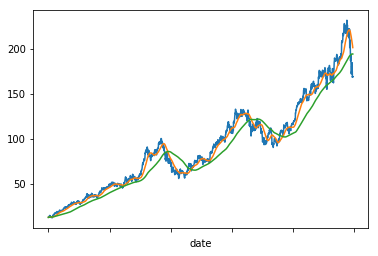

In [20]:
print(dataframe.columns.get_values())
sp_close_series = dataframe.close
sp_close_series.plot()
sp_sma_series_50 = dataframe.close_50_sma  
sp_sma_series_50.plot()
sp_sma_series_200 = dataframe.close_200_sma  
sp_sma_series_200.plot()

## Model
We use a simple linear regression as the first model for our prediction.
We also use pipline to do some feature tasks:
+ Impute missing values using the mean
+ Transform features to quadratic
+ Fit a linear regression
The returned performances are quit good with R^2 in range of [0.5,1]

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer 
from sklearn import model_selection

model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

X = dataframe.loc[:, dataframe.columns != 'label_price']
y = dataframe.loc[:,'label_price']
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("MAE: ", results.mean(), results.std())
scoring = 'r2'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("R^2:", results.mean(), results.std())

MAE:  -1.9891956582192676 0.4856277531018354
R^2: 0.8332197569428601 0.13336314034475194
